In [1]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing



from sklearn.metrics import r2_score

from sklearn.impute import SimpleImputer


In [2]:
arquivo = pd.read_csv("./UNSW_NB15_testing-set.csv",low_memory=False)
arquivo2 = pd.read_csv("./UNSW_NB15_training-set.csv",low_memory=False)

In [3]:
def col_countplot(col, train_data=arquivo):
    """
    Essa função plota um countplot de uma característica específica do conjunto de dados de treinamento.
    """
    # Cria uma figura e um eixo com um tamanho específico (8x4)
    fig, ax = plt.subplots(figsize=(8,4))
    # Define o estilo da grade branca
    sns.set_style('whitegrid')
    # Cria um countplot usando a coluna especificada como o eixo x e o rótulo da coluna 'label' como o eixo y
    ax = sns.countplot(x=col, hue='label', data=train_data)
    # Adiciona uma legenda para os rótulos 'normal' e 'ataque'
    ax.legend(loc="upper right", labels=('normal', 'ataque'))
    # Define o título do countplot como "train data"
    ax.set_title("dados de treinamento")
    # Gira os rótulos do eixo x em 45 graus para melhor legibilidade
    plt.xticks(rotation=45)
    # Exibe o countplot
    plt.show()

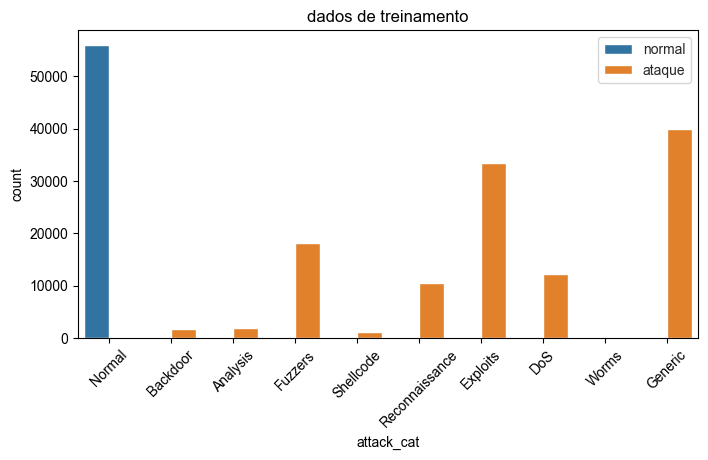

In [4]:
col_countplot('attack_cat',arquivo)

In [5]:
def reduce_column(s, to_keep):
    """
    Esta função reduz os valores categóricos de uma característica específica para valores fornecidos na lista to_keep
    e transforma todos os outros valores em "outros".
    """
    # Converte para minúsculo e remove espaços em branco
    s = s.lower().strip()
    # Se o valor não estiver na lista to_keep, retorna "outros"
    if s not in to_keep:
        return "outros"
    else:
        return s

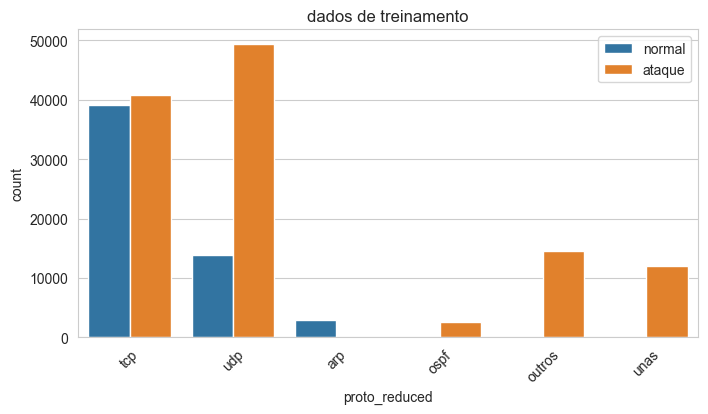

In [6]:
# Lista de valores a serem mantidos na coluna 'proto'
to_keep = ['tcp', 'udp', 'unas', 'arp', 'ospf']

# Aplica a função reduce_column na coluna 'proto' e armazena o resultado em uma nova coluna chamada 'proto_reduced'
arquivo['proto_reduced'] = arquivo['proto'].apply(reduce_column, args=(to_keep,))

# Plota o countplot da coluna 'proto_reduced'
col_countplot('proto_reduced')


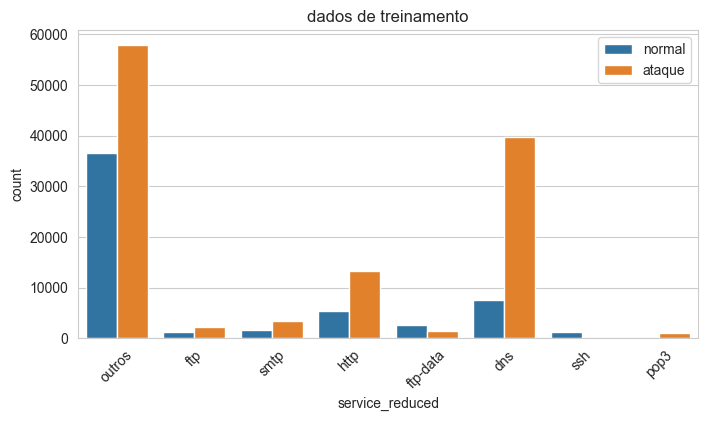

In [7]:
to_keep = ['dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']
arquivo['service_reduced'] = arquivo['service'].apply(reduce_column, args=(to_keep,))
col_countplot('service_reduced')

FUNÇÕES PARA PLOTAGEM: 


In [8]:
arquivo = pd.read_csv("./UNSW_NB15_testing-set.csv",low_memory=False)


In [9]:
# selecting numeric attributes columns from data
num_col = list(arquivo.select_dtypes(include='number').columns)
num_col.remove('label')
print(num_col)




['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [10]:
# one-hot-encoding attack label
multi_data = arquivo.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

multi_data.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,0,0,0,0,0,0,1,0,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,0,0,0,0,0,0,1,0,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,0,0,0,0,0,0,1,0,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,0,0,0,0,0,0,1,0,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,0,0,0,0,0,0,1,0,0,0


Correlation Matrix for Multi-class Labels

In [11]:
num_col.append('label')

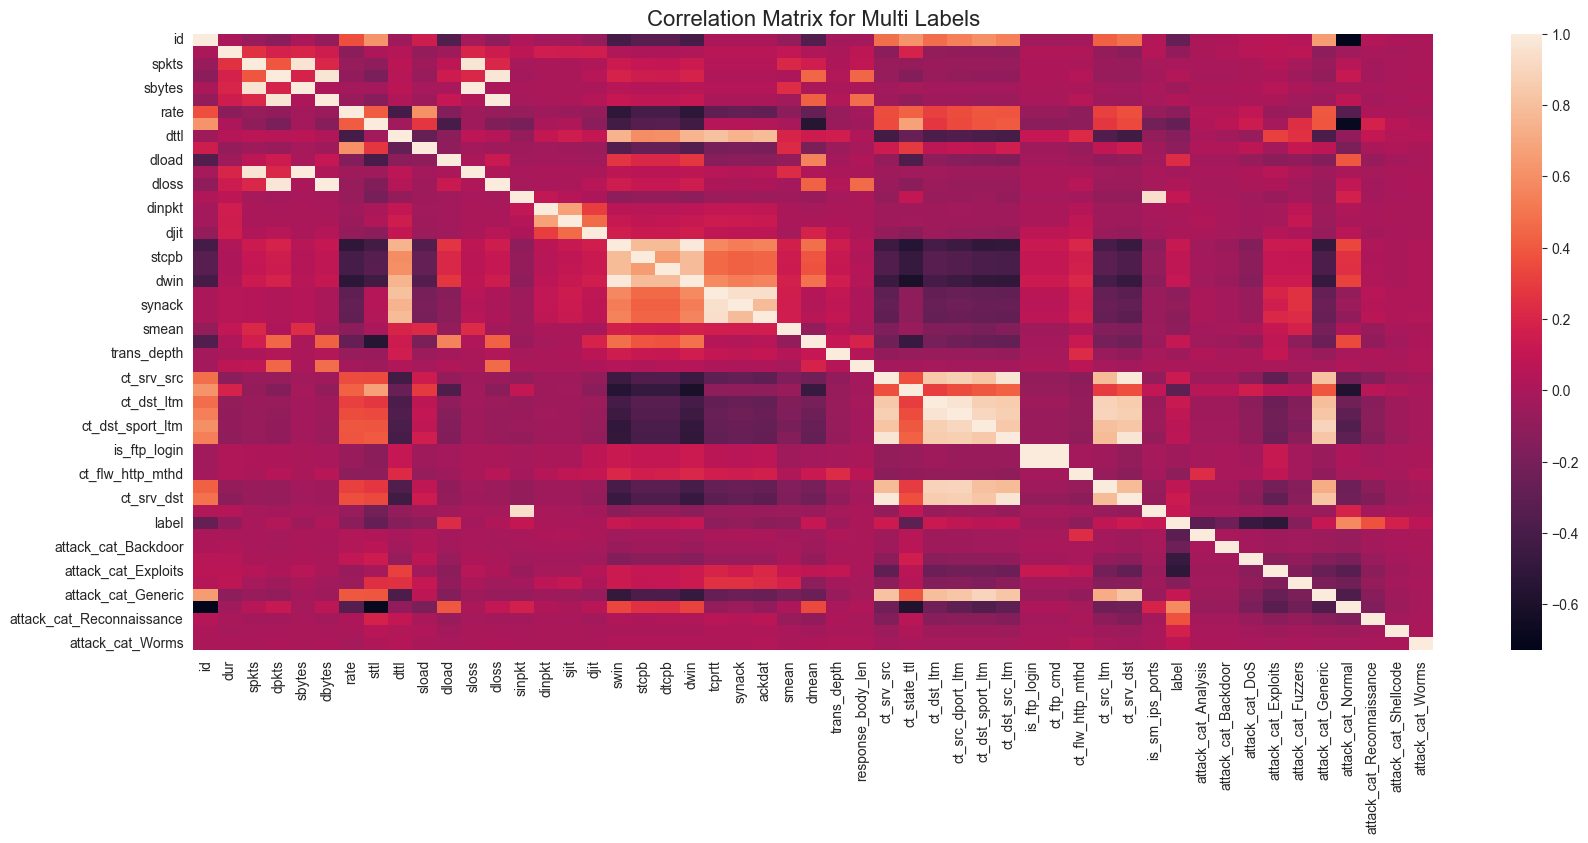

In [12]:
num_col = list(multi_data.select_dtypes(include='number').columns)

# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('./correlation_matrix_multi.png')
plt.show()

In [13]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

ct_state_ttl                 0.302136
attack_cat_Analysis          0.319875
attack_cat_Reconnaissance    0.374792
attack_cat_DoS               0.466914
attack_cat_Exploits          0.516529
attack_cat_Normal            0.580908
label                        1.000000
Name: label, dtype: float64

In [14]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['ct_state_ttl', 'label', 'attack_cat_Analysis', 'attack_cat_DoS',
       'attack_cat_Exploits', 'attack_cat_Normal',
       'attack_cat_Reconnaissance'],
      dtype='object')

In [15]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()
multi_data.to_csv('./multi_data.csv')


### MODELOS DE CLASSIFICAÇÃO MULTIPLA


In [16]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']


x_treino,x_teste,y_treino,y_teste = train_test_split(X,Y,test_size=0.25, random_state=80)

### ARVORE DE DECISÃO (DT)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# cria um modelo de árvore de decisão
modelo = DecisionTreeClassifier()

# treina o modelo
modelo.fit(x_treino, y_treino)

# faz previsões no conjunto de teste
y_previsao_DT = modelo.predict(x_teste)

# calcula as métricas de avaliação
acuracia = accuracy_score(y_teste, y_previsao_DT)
precisao = precision_score(y_teste, y_previsao_DT, average='weighted')
revocacao = recall_score(y_teste, y_previsao_DT, average='weighted')
f1 = f1_score(y_teste, y_previsao_DT, average='weighted')
matriz_confusao = confusion_matrix(y_teste, y_previsao_DT)
relatorio_classificacao = classification_report(y_teste, y_previsao_DT)

# exibe as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)
print("Matriz de Confusão:")
print(matriz_confusao)
print("Relatório de Classificação:")
print(relatorio_classificacao)


Acurácia: 0.9446801715484989
Precisão: 0.9360834366971512
Revocação: 0.9446801715484989
F1-Score: 0.9357823186511609
Matriz de Confusão:
[[  509     0     0     0     0     0     0     0     0     0]
 [    0    12     0     0    75   339     0     0     0     0]
 [    0     0  3082     0     0     0     0     0     0     0]
 [    0     0     0  8256     0     0     0     0     0     0]
 [    0    14     0     0  3096  1525     0     0     0     0]
 [    0     5     0     0   151  9923     0     0     0     0]
 [    0     0     0     0     0     0 13893     0     0     0]
 [    0     0     0     0     0     0     0  2640     0     0]
 [    0     0     0     0   137   140     0     0     0     0]
 [    0     0     0     0    36     3     0     0     0     0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       509
           1       0.39      0.03      0.05       426
           2       1.00      1.00      1.

c:\Users\thelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

RAMDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# cria um modelo de Random Forest
modelo = RandomForestClassifier()

# treina o modelo
modelo.fit(x_treino, y_treino)

# faz previsões no conjunto de teste
y_previsao_RF = modelo.predict(x_teste)

# calcula as métricas de avaliação
acuracia = accuracy_score(y_teste, y_previsao_RF)
precisao = precision_score(y_teste, y_previsao_RF, average='weighted')
revocacao = recall_score(y_teste, y_previsao_RF, average='weighted')
f1 = f1_score(y_teste, y_previsao_RF, average='weighted')
matriz_confusao = confusion_matrix(y_teste, y_previsao_RF)
relatorio_classificacao = classification_report(y_teste, y_previsao_RF)

# exibe as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)
print("Matriz de Confusão:")

print(relatorio_classificacao)


Acurácia: 0.9446801715484989
Precisão: 0.9360834366971512
Revocação: 0.9446801715484989
F1-Score: 0.9357823186511609
Matriz de Confusão:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       509
           1       0.39      0.03      0.05       426
           2       1.00      1.00      1.00      3082
           3       1.00      1.00      1.00      8256
           4       0.89      0.67      0.76      4635
           5       0.83      0.98      0.90     10079
           6       1.00      1.00      1.00     13893
           7       1.00      1.00      1.00      2640
           8       0.00      0.00      0.00       277
           9       0.00      0.00      0.00        39

    accuracy                           0.94     43836
   macro avg       0.71      0.67      0.67     43836
weighted avg       0.94      0.94      0.94     43836



c:\Users\thelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

REDES NEURAIS


In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# cria um modelo de rede neural
modelo = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu')

# treina o modelo
modelo.fit(x_treino, y_treino)

# faz previsões no conjunto de teste
y_previsao_RN = modelo.predict(x_teste)

# calcula as métricas de avaliação
acuracia = accuracy_score(y_teste, y_previsao_RN)
precisao = precision_score(y_teste, y_previsao_RN, average='weighted')
revocacao = recall_score(y_teste, y_previsao_RN, average='weighted')
f1 = f1_score(y_teste, y_previsao_RN, average='weighted')
matriz_confusao = confusion_matrix(y_teste, y_previsao_RN)
relatorio_classificacao = classification_report(y_teste, y_previsao_RN)

# exibe as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)
print(relatorio_classificacao)



Acurácia: 0.9446801715484989
Precisão: 0.9360834366971512
Revocação: 0.9446801715484989
F1-Score: 0.9357823186511609
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       509
           1       0.39      0.03      0.05       426
           2       1.00      1.00      1.00      3082
           3       1.00      1.00      1.00      8256
           4       0.89      0.67      0.76      4635
           5       0.83      0.98      0.90     10079
           6       1.00      1.00      1.00     13893
           7       1.00      1.00      1.00      2640
           8       0.00      0.00      0.00       277
           9       0.00      0.00      0.00        39

    accuracy                           0.94     43836
   macro avg       0.71      0.67      0.67     43836
weighted avg       0.94      0.94      0.94     43836



c:\Users\thelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thelo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms